## Machine Learning using MNIST Dataset

1. Dataset: https://www.kaggle.com/c/digit-recognizer/data
2. Problem statement: Handwritten digit recognization (0-9)
3. Type of problem: Classification, Supervised
4. Data type: Images stored in csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix
6. Feature Importance: Not required
7. Interpretability: We can provide nearest neighbors of the query image to justify why image is classified as 'this'

## Classification Algorithms:
1. K-Nearest Neighbor
2. Logistic Regression (one-vs-rest)
3. SVM Classifier
4. Decision Tree
5. Random Forest


## Other Libraries:
1. GridsearchCV for hyperparameter tuning
2. randomsearchCV for hyperparameter tuning

Reference Link: https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv

## Data Visualization
1. Principal Component Analysis
2. t-SNE

Reference Link: https://www.datacamp.com/community/tutorials/introduction-t-sne

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Import dataset
mnist_train = pd.read_csv(r"F:\Priyanaka\Dataset\digit-recognizer\train.csv")
mnist_test = pd.read_csv(r"F:\Priyanaka\Dataset\digit-recognizer\test.csv")

In [3]:
##EDA

In [4]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_train.shape

(42000, 785)

In [7]:
mnist_test.shape

(28000, 784)

In [8]:
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


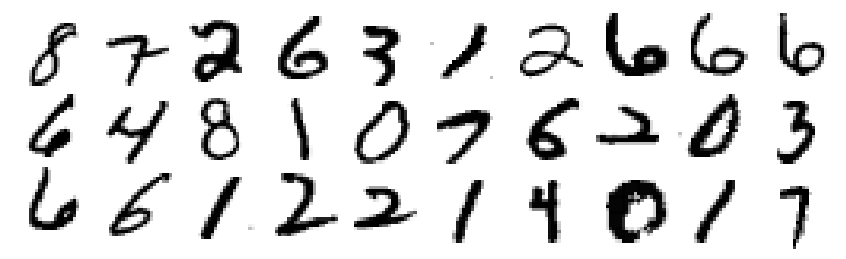

In [10]:
# VISUALIZE DATA
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [11]:
## Check whether data is balanced or imbalanced

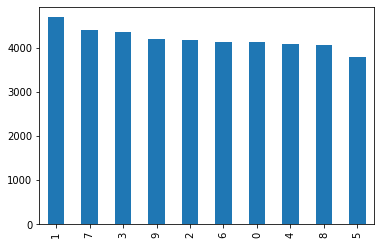

In [12]:
mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

## Principal Component Analysis for data visualization
Link : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [13]:
X = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [14]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


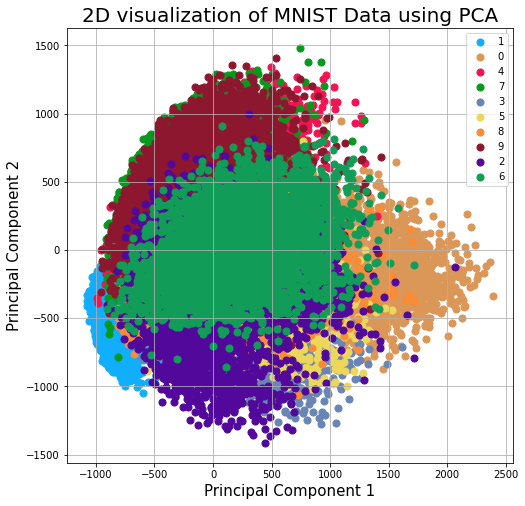

In [15]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()

### From above figure it is obvious conclusion is that data is not seperable. However this is not the case as PCA has some drawbacks.

#### Next technique we try is t-SNE

Link: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [16]:
tsneData = TSNE(random_state=10).fit_transform(X)

C:\Users\cool\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\cool\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-32.013294, 37.732697, '0'),
  Text(-2.2445636, -47.642147, '1'),
  Text(-41.032948, -20.655132, '2'),
  Text(-29.308237, 7.4275036, '3'),
  Text(51.66285, -0.8821458, '4'),
  Text(7.128121, 21.34314, '5'),
  Text(7.7578588, 47.09817, '6'),
  Text(15.056986, -18.768812, '7'),
  Text(-8.531831, -9.138049, '8'),
  Text(33.994507, -7.495675, '9')])

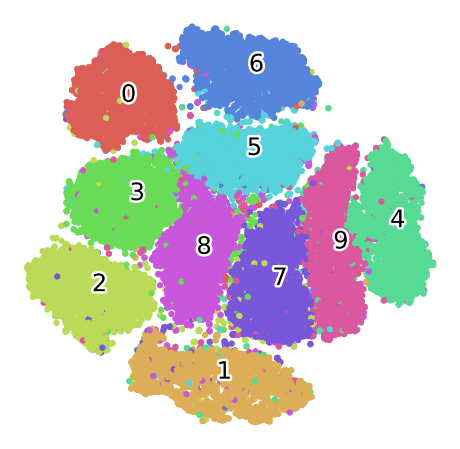

In [18]:
ScatterPlotTsne(tsneData,y)

### From above figure we can say data is seperable as seperate clusters are formed for each digit

In [19]:
sample_csv = pd.read_csv(r'F:\Priyanaka\Dataset\digit-recognizer\sample_submission.csv')


### Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [20]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


## KNN Classifier
Link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [21]:
def trainKNN(X_train, y_train, k): 
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [22]:
def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred


In [23]:
def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [24]:
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:31<00:00, 30.20s/it]


In [25]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9555555555555556,
 0.9517460317460318,
 0.947936507936508,
 0.9457142857142857,
 0.9442857142857143]

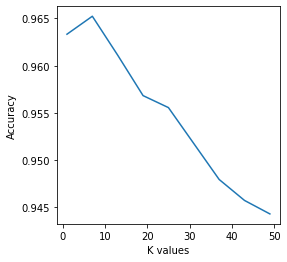

In [26]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [27]:
clf = trainKNN(X_train,y_train, 9)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.9406666666666667


## SVM Classifier
Link: https://scikit-learn.org/stable/modules/svm.html


### Basic SVM Classifier


In [28]:
clf = SVC(C=10, gamma=0.001, kernel="rbf")
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [30]:
clf_svm_l = SVC(kernel ='linear', C = 100)
clf_svm_l.fit(X_train,y_train)

SVC(C=100, kernel='linear')

In [32]:
y_pred = predictClassifier(X_test,clf)
acc = calculateAccuracy(y_test, y_pred)
print("Final Accuracy: ",acc)

Final Accuracy:  0.11342857142857143


### Logistic Regression
Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [33]:
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=-1,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

C:\Users\cool\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=2.0826774385596982, penalty=l2............................
[CV 1/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.916 total time= 5.7min
[CV 2/5; 1/8] START C=2.0826774385596982, penalty=l2............................
[CV 2/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.920 total time= 3.9min
[CV 3/5; 1/8] START C=2.0826774385596982, penalty=l2............................
[CV 3/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.910 total time= 3.6min
[CV 4/5; 1/8] START C=2.0826774385596982, penalty=l2............................
[CV 4/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.908 total time= 3.7min
[CV 5/5; 1/8] START C=2.0826774385596982, penalty=l2............................
[CV 5/5; 1/8] END C=2.0826774385596982, penalty=l2;, score=0.911 total time= 3.7min
[CV 1/5; 2/8] START C=2.0826774385596982, penalty=l1............................
[CV 1/5; 2/8] END C=2.082677438559

C:\Users\cool\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [34]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.9999867067456014, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.001)
0.9131428571428571


In [35]:
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

C:\Users\cool\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.9999867067456014, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.001)

In [36]:
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.9141904761904762


### Decision Tress Classifier
Link: https://scikit-learn.org/stable/modules/tree.html

In [37]:
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:28<00:00,  8.08s/it]


In [38]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097619047619048, 0.9556746031746032, 0.9851984126984127, 0.9958333333333333, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.74, 0.8136507936507936, 0.8447619047619047, 0.8496825396825397, 0.8561904761904762, 0.8482539682539683, 0.8487301587301588, 0.8465079365079365, 0.8476190476190476, 0.844920634920635]


In [39]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

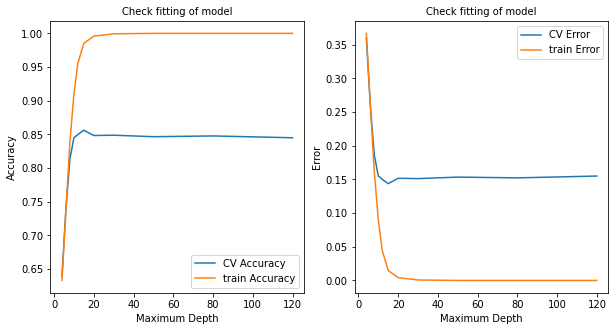

In [40]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [41]:
clfDT = clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

Final Accuracy DT:  0.8503809523809523


### Random Forest Classifier
Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [43]:
NoEstimators = [50,70,100,130,150,190,230,290,370,450,550,700]
trainAcc = []
CVAcc = []

In [44]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv) 

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [15:37<00:00, 78.12s/it]


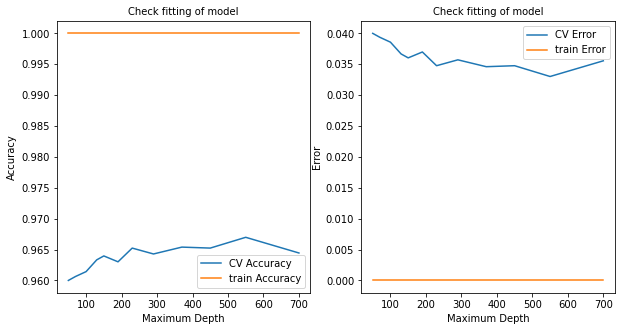

In [45]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,NoEstimators)

In [46]:
maxAccuracy = max(CVAcc)
maxAccuracy

0.966984126984127

In [47]:
clfRF = RandomForestClassifier(n_estimators=370, criterion='gini')
clfRF.fit(X_train, y_train)
y_predRF = clfRF.predict(X_test)
print("Final Accuracy RF: ",accuracy_score(y_test,y_predRF))

Final Accuracy RF:  0.9634285714285714


Final Accuracies
1. KNN                   0.94066  
2. Logistic Regression   0.9125
3. SVM                   0.11 (Something went wrong!!!)
4. Decision Tree         0.84923
5. Random Forest         0.964


### we got 96%  best accuracy from ensemble method Random Forest